# Project: CNN

Team members:  
Full Name | Student ID | GitHub Profile Link | Project GitHub Repository Link
- **Anish Ghimire (101143773)**  
[https://github.com/anish-g] [https://github.com/anish-g/MLF-CNN-Project]

- **Prajwol Tiwari (101144638)**  
[https://github.com/prajwol148] [https://github.com/prajwol148/CNN-Implementation-for-MNIST-Digit-Recognition]

- **Pramesh Baral (101139536)**  
[https://github.com/prms318] [https://github.com/Prms318/CNN-Team-Project]

- **Pradip Ganesh (101124775)**  
[https://github.com/pradipganesh61] [https://github.com/pradipganesh61/CNN]

- **Shashwat Shrestha (101130302)**  
[https://github.com/shashwatstha23] [https://github.com/shashwatstha23/cnnproject_mlf]

- **Raman Regmi (101131084)**  
[https://github.com/ramanregmi] [https://github.com/ramanregmi/Project]


**Overview**

The goal of this project is to build and evaluate a Convolutional Neural Network (CNN) for recognizing handwritten digits from the MNIST Dataset.

## Data Exploration and Preparation

This version of MNIST dataset titled 'Optical Recognition of Handwritten Digits' is hosted in **UC Irvine Machine Learning Repository**.

Datasets can be directly fetched by using their python library called `ucimlrepo`.

Installing the `ucimlrepo` python library.

In [1]:
!pip install ucimlrepo

Fetching the dataset from the UCI Machine Learning Repository

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

# data (as pandas dataframes)
X = optical_recognition_of_handwritten_digits.data.features
y = optical_recognition_of_handwritten_digits.data.targets

# metadata
print(optical_recognition_of_handwritten_digits.metadata)

# variable information
print(optical_recognition_of_handwritten_digits.variables)


{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'published_in': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, Bogazici University', 

Important necessary libraries for data manipulation

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Grouping the dataset by class so that a random data can be picked from each class.

In [4]:
gk = y.groupby('class')

Storing class names as it comes in the dataset

In [5]:
class_labels = y['class'].unique()

This version of MNIST dataset has already been normalized and dimensionality reduced.

The images are in the form  of matrix of size 8*8 where each element is an integer in the range 0...16.

However, the image is flatten into an array of length 64.

The feature set is reshaped from 1D to 2D (8*8 pixels), aligning with the CNN's input requirements.

In [6]:
X_images = X.to_numpy().reshape(-1, 8, 8)

Method to get a random index for sample images of each class so that a sample image for each digit class can be visualized.

In [7]:
def get_index_sample_each_class():
  sample_indices = []

  for i in range(10):
    sample_indices.append(gk.get_group(i).sample().index[0])

  return sample_indices

Visualizing a sample image from each digit class

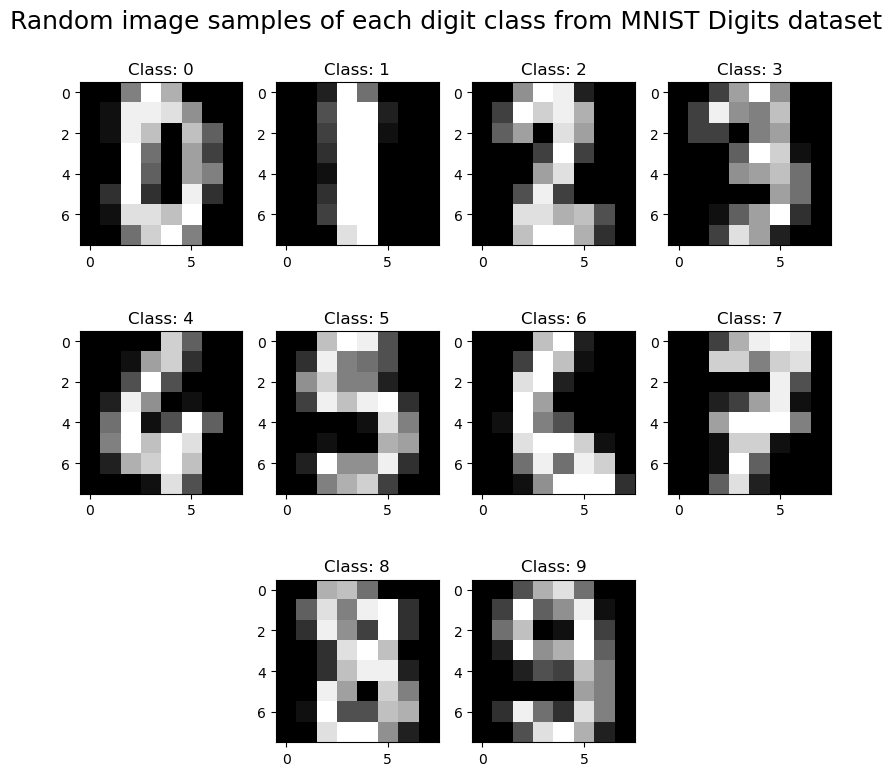

In [8]:
sample_idxs = get_index_sample_each_class()

plt.figure(figsize=(8, 8))

for i in range(10):

  plt.subplot(3, 4, i + 1 if i < 8 else i + 2)

  plt.imshow(X_images[sample_idxs[i]], cmap='gray', interpolation='none')
  plt.title(f'Class: {i}')

plt.suptitle('Random image samples of each digit class from MNIST Digits dataset',
             fontsize=18)

plt.tight_layout()
plt.show()

The dataset is divided into training and testing sets with an 80-20 split to ensure a fair evaluation of the model. The training set helps in fitting the model, while the testing set is used to evaluate its generalization capability.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_images,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

print(f'Shape of train-test data after split.\
\nX_train: {X_train.shape}\tX_test: {X_test.shape}\
\ny_train: {y_train.shape}\ty_test: {y_test.shape}')

Shape of train-test data after split.
X_train: (4496, 8, 8)	X_test: (1124, 8, 8)
y_train: (4496, 1)	y_test: (1124, 1)


The labels are converted from a class vector (integers) to binary class matrix for use with categorical crossentropy during the training of the model.

In [11]:
from keras.utils import to_categorical

In [12]:
y_train_labels = y_train
y_test_labels = y_test

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

## Convolutional Neural Network Architecture

Importing necessary modules from keras

In [13]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam

from keras.models import Model

Method to build CNN architecture

In [14]:
def create_cnn_model():
  model = Sequential()

  model.add(Conv2D(filters=16,
                  kernel_size=(3, 3),
                  activation='relu',
                  strides=1,
                  padding='same',
                  data_format='channels_last',
                  input_shape=(8, 8, 1)))

  model.add(MaxPooling2D(pool_size=(2, 2),
                        strides=2,
                        padding='valid'))

  model.add(Dropout(0.25))

  model.add(Conv2D(filters=32,
                  kernel_size=(3, 3),
                  activation='relu',
                  strides=1,
                  padding='same',
                  data_format='channels_last'))

  model.add(MaxPooling2D(pool_size=(2, 2),
                        strides=2,
                        padding='valid'))

  model.add(Dropout(0.25))

  model.add(Conv2D(filters=64,
                  kernel_size=(3, 3),
                  activation='relu',
                  strides=1,
                  padding='same',
                  data_format='channels_last'))

  model.add(MaxPooling2D(pool_size=(2, 2),
                        strides=2,
                        padding='valid'))

  model.add(Dropout(0.25))

  model.add(Flatten())

  model.add(Dense(128, activation='sigmoid'))

  model.add(Dropout(0.25))

  model.add(Dense(512, activation='sigmoid'))

  model.add(Dropout(0.25))

  model.add(Dense(10, activation='softmax'))

  return model

In [15]:
model = create_cnn_model()

Visualizing the CNN architecture

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 16)          160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 16)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 4, 4, 16)          0         
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 32)          4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 2, 2, 32)          0

The CNN architecture designed for recognizing 8x8 pixel images of handwritten digits comprises several layers, each with specific functions aimed at processing and transforming the input images into a form where digit classifications can be made effectively.

1. First Convolutional Layer
 - Parameters: Consists of 16 filters, each of size 3x3.
 - Activation: Utilizes the ReLU activation function.
 - Dimensions: Maintains the same spatial dimensions (8x8) due to the 'same' padding strategy.
 - Effect: This layer is responsible for capturing basic visual features such as edges and gradients within the image. Each filter produces a separate feature map, resulting in 16 different representations of the input image, each highlighting different aspects of the image.

2. First Pooling Layer
 - Pooling Size: Uses a 2x2 window for pooling.
 - Strides: With a stride of 2 and 'valid' padding, it reduces the spatial dimensions of each feature map from 8x8 to 4x4.
 - Effect: Pooling layers serve to reduce the spatial dimensions of the feature maps, which decreases the number of parameters and computation in the network. This operation helps in extracting the dominant features while reducing the sensitivity to the exact locations of features.

3. First Dropout Layer
 - Dropout Rate: Set at 25%.
 - Effect: Dropout layers randomly set a fraction of the input units to zero during training, which helps in preventing overfitting by ensuring that no single set of neurons within the layer overly specializes to the training data.

4. Second Convolutional Layer
 - Parameters: Increases to 32 filters, maintaining the 3x3 size.
 - Activation: Continues with ReLU activation.
 - Dimensions: The feature maps remain at 4x4 due to 'same' padding.
 - Effect: This layer extracts more complex features from the simplified outputs provided by the first pooling layer. By increasing the number of filters, it allows the network to develop a richer understanding of the input data.

5. Second Pooling Layer
 - Pooling Size and Strides: Same as the first pooling layer, reducing each feature map size further from 4x4 to 2x2.
 - Effect: Further reduces the spatial dimensions, focusing on the most salient features, and helps in further reducing the computational complexity.

6. Second Dropout Layer
 - Dropout Rate: Maintains at 25%.
 - Effect: Adds another layer of regularization to enhance the model's generalization capabilities.

7. Third Convolutional Layer
 - Parameters: Further increases the filter count to 64.
 - Activation: Uses ReLU activation.
 - Dimensions: Maintains the 2x2 dimensions with 'same' padding.
 - Effect: This layer captures even higher-level features from the input data. With more filters, the network can capture a more diverse set of features, crucial for accurate classification tasks.

8. Third Pooling Layer
 - Effect: Reduces each 2x2 feature map to 1x1, effectively distilling the feature maps to their most essential elements.

9. Third Dropout Layer
 - Effect: Further ensures that the model avoids overfitting, especially important as the complexity of the model increases.

10. Flatten Layer
 - Effect: Transforms the 3D output of the previous convolutional layers to a 1D array without affecting the batch size. This layer prepares the data for the final classification steps in the dense layers.

11. Dense and Dropout Layers
 - Configuration: Includes dense layers with 128 and 512 neurons, each followed by a dropout layer, with sigmoid activation for the dense layers and softmax for the final output.
 - Effect: These layers integrate the features learned by the convolutions into predictions for the 10 classes of digits. The dropout layers interspersed between them prevent overfitting by randomly dropping a portion of the neurons, ensuring that different neurons can learn to identify various features independently.

12. Output Layer
 - Activation: Uses softmax activation.
 - Effect: Outputs the probability distribution across the 10 digit classes, allowing for the classification of the input digit image into one of these classes based on the highest probability.

**Model Compilation**

Optimizer:  

The model uses the Adam optimizer, which is an extension to stochastic gradient descent. This optimizer is particularly effective for problems involving a lot of data or parameters. Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.

Loss Function:
`categorical_crossentropy` loss function is used when there are two or more label classes. The labels are expected to be provided in a one-hot representation. This is appropriate since the network's output uses a softmax activation function, which outputs a probability distribution over the classes. Categorical crossentropy will compare the distribution produced by the output layer with the true distribution, where the true probability is 100% for the actual class.

In [17]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

## Visualizing CNN feature maps

Visualizing the feature maps of the CNN architecture after it processes the input image.

`activation_model` is a new model derived from the original model but designed to output the activations from each convolutional and max pooling layer instead of just the final output.

For each layer, a grid of all filter outputs (feature maps) is displayed. The grid is scaled based on the number of filters, providing a clear view of each filter’s pattern recognition.

In [18]:
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

activation_model = Model(inputs=model.input,
                         outputs=[layer.output for layer in model.layers if isinstance(layer, (Conv2D, MaxPooling2D))])

def display_feature_maps(image_index, X_images):
    input_tensor = np.expand_dims(X_images[image_index], axis=0)
    plt.figure(figsize=(2, 2))
    plt.title('Original image')
    plt.imshow(X_images[image_index], aspect='auto', cmap='gray')
    plt.show()

    activations = activation_model.predict(input_tensor)

    for layer, layer_activation in zip([layer for layer in model.layers if isinstance(layer, (Conv2D, MaxPooling2D))], activations):
        num_filters = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        display_grid = np.zeros((size, size * num_filters))

        for i in range(num_filters):
            x = layer_activation[0, :, :, i]
            x -= x.mean()
            if x.std() > 0:
                x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x

        scale = 20. / num_filters
        plt.figure(figsize=(scale * num_filters, scale))
        plt.title(layer.name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='gray')
        plt.show()

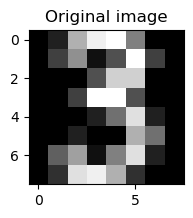

1/1 [==============================] - 0s 273ms/step


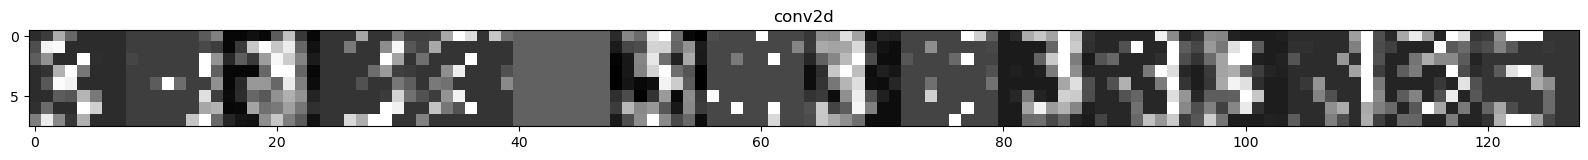

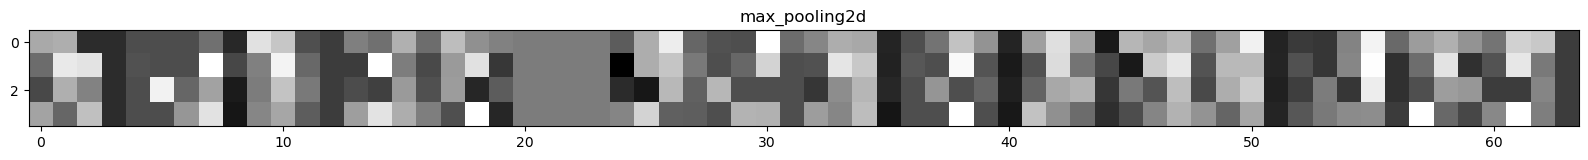

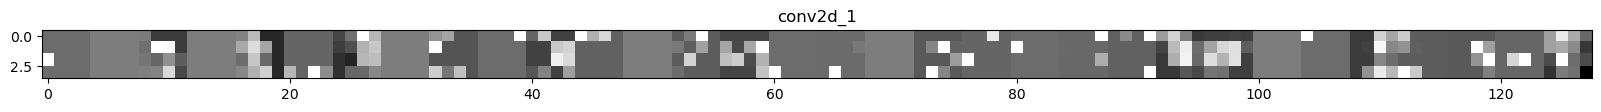

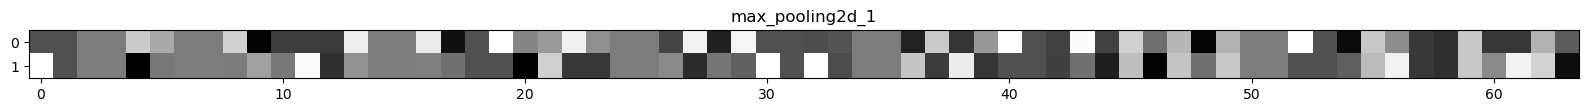

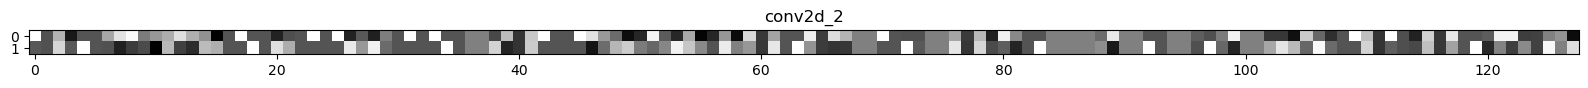

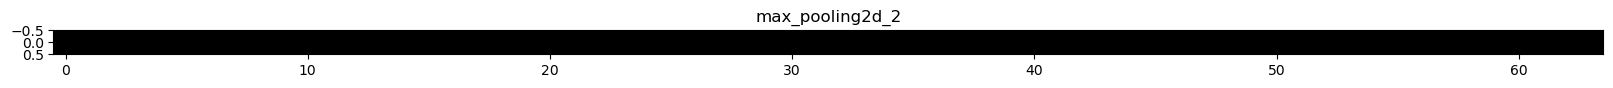

In [19]:
display_feature_maps(59, X_images)

This demonstrates the CNN's ability to hierarchically extract and abstract features from raw pixel values.

As the image moves through the layers of the network, we can observe the transition from simple, low-level features to complex, high-level features that contribute to the network's understanding and classification of the image.

## Model Training

The CNN model is trained on the training data for 100 epochs with a batch size of 128.

In [20]:
# batch_size = 64
batch_size = 128
epochs = 100

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/100
36/36 [==============================] - 1s 8ms/step - loss: 2.3891 - accuracy: 0.1074
Epoch 2/100
36/36 [==============================] - 0s 10ms/step - loss: 2.0086 - accuracy: 0.2709
Epoch 3/100
36/36 [==============================] - 0s 10ms/step - loss: 1.4101 - accuracy: 0.5207
Epoch 4/100
36/36 [==============================] - 0s 9ms/step - loss: 0.9848 - accuracy: 0.6837
Epoch 5/100
36/36 [==============================] - 0s 8ms/step - loss: 0.7249 - accuracy: 0.7785
Epoch 6/100
36/36 [==============================] - 0s 8ms/step - loss: 0.5431 - accuracy: 0.8392
Epoch 7/100
36/36 [==============================] - 0s 8ms/step - loss: 0.4437 - accuracy: 0.8614
Epoch 8/100
36/36 [==============================] - 0s 8ms/step - loss: 0.3828 - accuracy: 0.8870
Epoch 9/100
36/36 [==============================] - 0s 9ms/step - loss: 0.3333 - accuracy: 0.8950
Epoch 10/100
36/36 [==============================] - 0s 9ms/step - loss: 0.3110 - accuracy: 0.9055
Epoch 1

36/36 [==============================] - 0s 9ms/step - loss: 0.0715 - accuracy: 0.9780
Epoch 83/100
36/36 [==============================] - 0s 8ms/step - loss: 0.0628 - accuracy: 0.9786
Epoch 84/100
36/36 [==============================] - 0s 7ms/step - loss: 0.0670 - accuracy: 0.9793
Epoch 85/100
36/36 [==============================] - 0s 8ms/step - loss: 0.0621 - accuracy: 0.9820
Epoch 86/100
36/36 [==============================] - 0s 11ms/step - loss: 0.0680 - accuracy: 0.9800
Epoch 87/100
36/36 [==============================] - 0s 10ms/step - loss: 0.0731 - accuracy: 0.9771
Epoch 88/100
36/36 [==============================] - 0s 9ms/step - loss: 0.0727 - accuracy: 0.9795
Epoch 89/100
36/36 [==============================] - 0s 8ms/step - loss: 0.0674 - accuracy: 0.9786
Epoch 90/100
36/36 [==============================] - 0s 8ms/step - loss: 0.0793 - accuracy: 0.9775
Epoch 91/100
36/36 [==============================] - 0s 11ms/step - loss: 0.0579 - accuracy: 0.9818
Epoch 92/1

Visualizing loss and accuracy while training

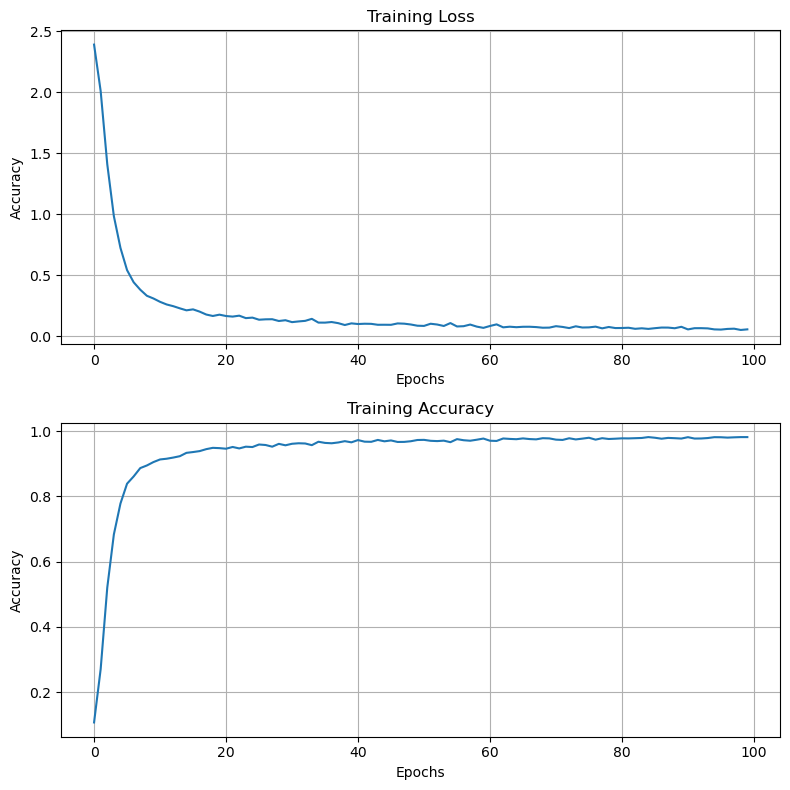

In [21]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(train_loss, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()


plt.subplot(2, 1, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()

plt.tight_layout()
plt.show()

## Model Evaluation

Evaluating the CNN model on the test data.

The loss and accuracy metrics indicates good model performance with high accuracy and low loss on the test set.

In [22]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test accuracy: {test_acc}")

36/36 [==============================] - 1s 3ms/step - loss: 0.0412 - accuracy: 0.9911
Test Loss: 0.04120912402868271
Test accuracy: 0.9911032319068909


In [23]:
y_pred = model.predict(X_test)

36/36 [==============================] - 0s 3ms/step


Other metrics are also calculated and visualized

The metrics show near perfect scores.

Accuracy: 99.11
Precision: 99.09
Recall: 99.11
F1 Score: 99.10



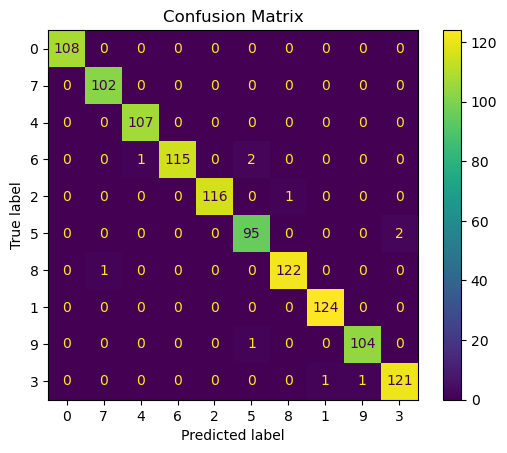

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

print(f"Accuracy: {accuracy_score(y_test_labels, y_pred_labels)*100:.2f}")
print(f"Precision: {precision_score(y_test_labels, y_pred_labels, average='macro')*100:.2f}")
print(f"Recall: {recall_score(y_test_labels, y_pred_labels, average='macro')*100:.2f}")
print(f"F1 Score: {f1_score(y_test_labels, y_pred_labels, average='macro')*100:.2f}\n")

cm = confusion_matrix(y_test_labels, y_pred_labels)

disp = ConfusionMatrixDisplay(cm, display_labels=class_labels)
disp.plot()
disp.ax_.set_title('Confusion Matrix')
plt.show()

## K-Fold Cross-Validation

Since the model shows near perfect metrics in all categories, validating these results with a proper cross-validation approach.

In [25]:
from sklearn.model_selection import KFold

K-Fold cross-validation for the CNN model from scratch.
- Folds: 5
- Initializes empty lists to store the loss and accuracy for each fold.
- Iterates over each fold, training a new model on the training set and evaluating it on the validation set.
- For each fold, it compiles a new instance of the CNN model with the Adam optimizer.
- Trains the model quietly (verbose=0 so it doesn't print out logs) for 100 epochs with a batch size of 128.
- Evaluates the model on the validation set and prints the fold number along with the validation results.

In [26]:
n_folds = 5
epochs = 100
batch_size = 128

kfold = KFold(n_splits=n_folds, shuffle=True)

kfold_hist_loss, kfold_hist_acc = [], []

fold_count = 1
print(f'K-Fold Cross-Validation on the CNN model [{n_folds} Folds]')

for train_index, val_index in kfold.split(X_images, y):

  t_x, val_x = X_images[train_index], X_images[val_index]
  t_y, val_y = y.iloc[train_index], y.iloc[val_index]

  t_y = to_categorical(t_y, num_classes=10)
  val_y = to_categorical(val_y, num_classes=10)

  model_tmp = create_cnn_model()
  optimizer_tmp = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
  model_tmp.compile(optimizer=optimizer_tmp, loss="categorical_crossentropy", metrics=["accuracy"])

  print(f"\nFold {fold_count} - Training")
  model_tmp.fit(t_x, t_y, epochs=epochs, batch_size=batch_size, verbose=0)

  val_loss, val_acc = model_tmp.evaluate(val_x, val_y, verbose=0)
  print(f'Fold {fold_count} - Validation')
  kfold_hist_loss.append(val_loss)
  kfold_hist_acc.append(val_acc)

  fold_count += 1

K-Fold Cross-Validation on the CNN model [5 Folds]

Fold 1 - Training
Fold 1 - Validation

Fold 2 - Training
Fold 2 - Validation

Fold 3 - Training
Fold 3 - Validation

Fold 4 - Training
Fold 4 - Validation

Fold 5 - Training
Fold 5 - Validation


Results of the K-fold cross-validation

In [27]:
print(f'Validation Loss and Accuracy across {n_folds} Folds.')
for i in range(n_folds):
  print(f'Fold {i+1}\tLoss: {kfold_hist_loss[i]}\tAccuracy: {kfold_hist_acc[i]}')

print(f'\nMean loss across {n_folds} folds: {np.mean(kfold_hist_loss)}')

print(f'\nMean cross-validation score: {np.mean(kfold_hist_acc)}')
print(f"Standard deviation of cross-validation scores: {np.std(kfold_hist_acc)}")

Validation Loss and Accuracy across 5 Folds.
Fold 1	Loss: 0.018141163513064384	Accuracy: 0.9928825497627258
Fold 2	Loss: 0.04472775757312775	Accuracy: 0.9902135133743286
Fold 3	Loss: 0.04290936887264252	Accuracy: 0.9830960631370544
Fold 4	Loss: 0.03728252649307251	Accuracy: 0.9893238544464111
Fold 5	Loss: 0.03052484430372715	Accuracy: 0.9919928908348083

Mean loss across 5 folds: 0.03471713215112686

Mean cross-validation score: 0.9895017743110657
Standard deviation of cross-validation scores: 0.0034411238805563847


Plotting the loss and accuracy of the CNN model across folds

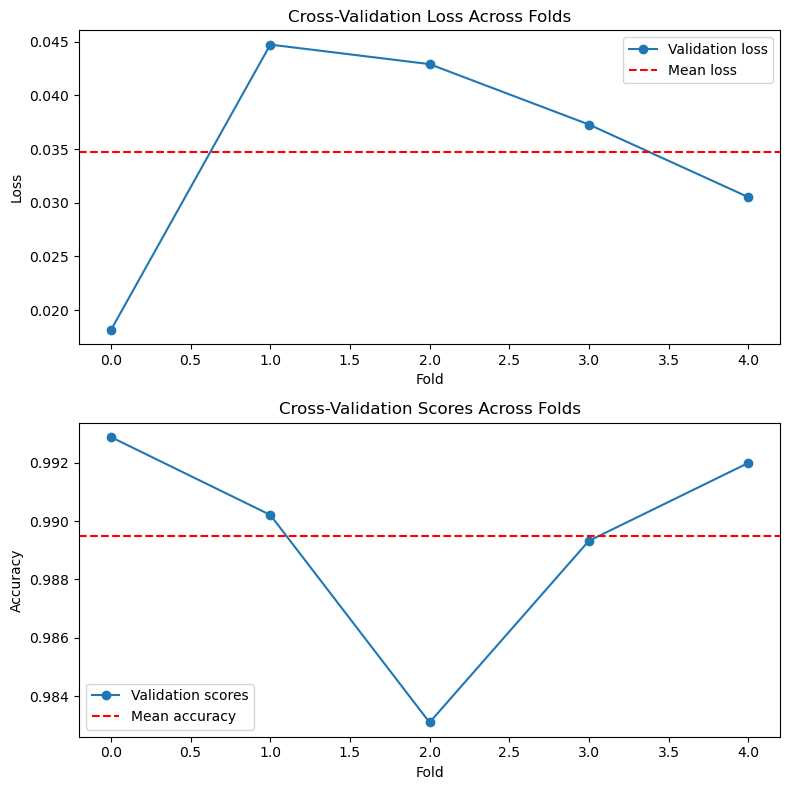

In [28]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(kfold_hist_loss, label='Validation loss', marker='o')
plt.axhline(y=np.mean(kfold_hist_loss), color='r', linestyle='--', label='Mean loss')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.title('Cross-Validation Loss Across Folds')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(kfold_hist_acc, label='Validation scores', marker='o')
plt.axhline(y=np.mean(kfold_hist_acc), color='r', linestyle='--', label='Mean accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores Across Folds')
plt.legend()

plt.tight_layout()
plt.show()

Further validation from K-Fold cross-validation with 5 folds confirmed the model's robustness and consistency across different subsets of data. Each fold was trained independently, and the model exhibited stable performance across all folds, validating its effectiveness and stability.

## Conclusion


1. **High Accuracy:** The CNN achieved near-perfect accuracy on the test set and consistent results across validation folds, highlighting its capability to effectively recognize handwritten digits.
2. **Robust Model Design:** The use of dropout layers and careful architectural choices helped in mitigating overfitting, as evidenced by consistent performance during K-Fold cross-validation.
3. **Effective Feature Extraction:** Visualization of feature maps revealed that the model was effectively capturing relevant features at various layers, crucial for accurate classification.
4. **Generalization Capability:** The consistent performance across multiple folds during cross-validation suggests that the model is not overly fitted to the training data but rather generalizes well to new, unseen data.
5. **Potential Improvements:** While results are already excellent, exploring additional enhancements such as further hyperparameter tuning, advanced regularization techniques, or experimenting with deeper architectures might provide marginal gains.

# 2AILab GitHub Follow

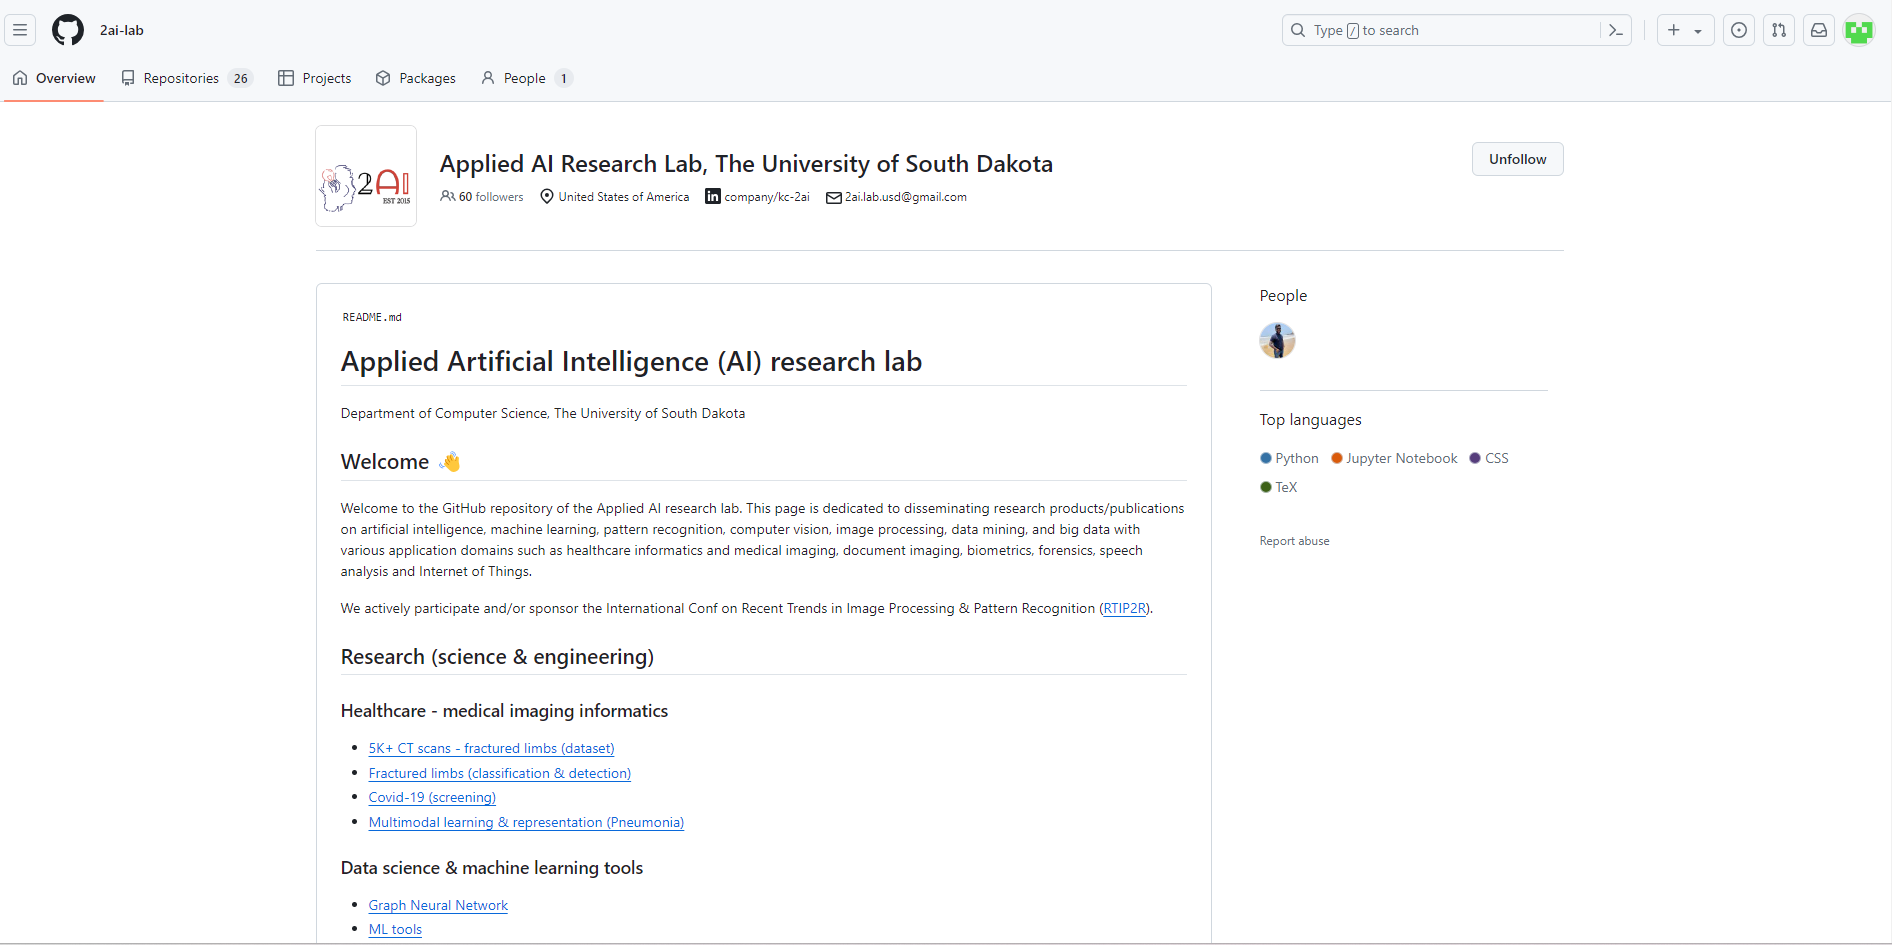

In [32]:
from IPython.display import Image
Image(filename='2AILab.png')